In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.ticker as ticker

dat = pd.read_csv('ap-northeast-1.csv')
i_list = set([idx for idx in dat['c3.8xlarge'].tolist() if idx.lower().startswith('i'.lower())])
dat = dat[(dat['c3.8xlarge'].isin(i_list) & (dat['Windows'] == 'Windows'))]
dat.columns = ['Date', 'Structure', 'OS', 'ap', 'Price']
dat['Date'] = (pd.to_datetime(dat['Date']).dt.strftime('%Y-%m-%d'))
dat.sort_values('Date', inplace = True)

dat_list = []
i = 0
for name in dat.Structure.unique():  
    dtl = dat[dat['Structure'] == name]
    dtl = dtl.groupby('Date').agg(['mean'])
    dtl.insert(0, 'Date', dtl.index)
    dtl.reset_index(drop=True, inplace=True)
    dtl.columns = ['Date', 'Price']
    dat_list.insert(i, dtl)
    i +=1
    
dat.head()

,Date,Structure,OS,ap,Price
1956356,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2157
1920521,2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,2.0510
1920541,2017-03-30,i2.xlarge,Windows,ap-northeast-1a,0.2159
1920543,2017-03-30,i2.8xlarge,Windows,ap-northeast-1c,1.8010
1920548,2017-03-30,i2.8xlarge,Windows,ap-northeast-1a,1.7529


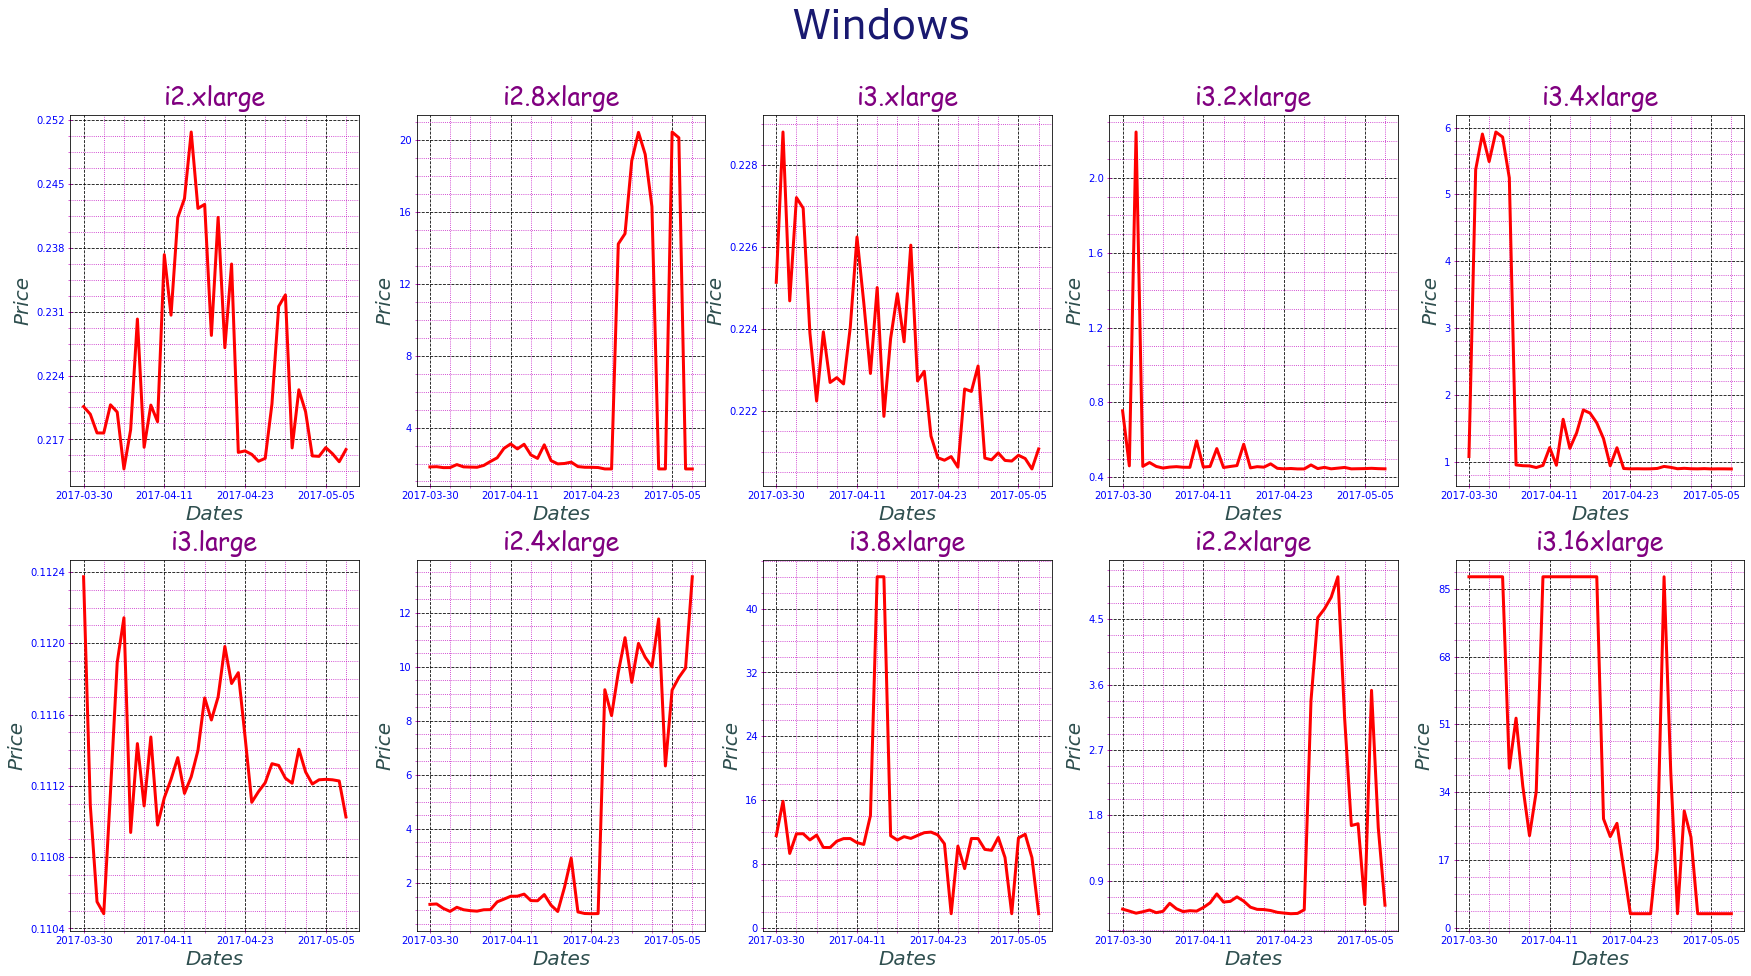

In [5]:
fig, ax = plt.subplots(2, len(dat.Structure.unique())//2, figsize = (30, 15))
i = 0
for row in range(2):
    for column in range(len(dat.Structure.unique())//2):
        fig.suptitle('Windows', fontsize=40, fontfamily = 'Verdana', fontstyle = 'normal', color = 'midnightblue')
        x = dat_list[i]['Date'].tolist()
        y = dat_list[i]['Price'].tolist()
        ax[row,column].plot(x, y, color = 'r', linewidth = 3)
        ax[row,column].set_title((dat.Structure.unique())[i], fontfamily = 'fantasy', fontstyle = 'italic',
                color = 'purple', fontsize = 25,pad = 10)
        ax[row, column].xaxis.set_major_locator(ticker.MultipleLocator(12))
        ax[row, column].xaxis.set_minor_locator(ticker.MultipleLocator(2))
        y_major = (dat_list[i].describe().loc['max', 'Price'] - dat_list[i].describe().loc['min', 'Price'])/5
        y_minor = y_major / 10
        
        if y_major >= 1:
            y_major = round(y_major,0)
        elif 0.01 <= y_major < 1:
            y_major = round(y_major,1)
        elif 0.001 <= y_major < 0.01:
            y_major = round(y_major,3)
        else:
            y_major = round(y_major,4)
            
        ax[row, column].yaxis.set_major_locator(ticker.MultipleLocator(y_major))
        ax[row, column].yaxis.set_minor_locator(ticker.MultipleLocator(y_minor))
        ax[row, column].tick_params(axis = 'both', which = 'major', direction = 'inout', color = 'm',
               labelcolor = 'b', bottom = True, left = True, labelbottom = True, labelleft = True)
        ax[row, column].tick_params(axis = 'both', which = 'minor', direction = 'out', color = 'm',
               labelcolor = 'r', bottom = True, left = True)
        ax[row, column].set_xlabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].set_ylabel('', fontsize = 20, color = 'darkslategrey', fontstyle = 'oblique')
        ax[row, column].grid(which='major', color = 'k', linestyle = '--')
        ax[row, column].minorticks_on()
        ax[row, column].grid(which='minor', color = 'm', linestyle = ':')
        i +=1
plt.setp(ax, xlabel = 'Dates', ylabel = 'Price')
plt.rcParams['axes.labelsize'] = 20
plt.show()